In [35]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [36]:
data = pd.read_csv("forestfires.csv")
data.head(5)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [37]:
X = data[['X','Y', 'FFMC', 'DMC','DC','temp','RH', 'wind','rain']].values
y = data['area'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.2)

In [39]:
mse_values = []
variance_score = []

In [40]:
decision_tree = tree.DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
predicted_y = decision_tree.predict(X_test)

print("Accuracy: ", decision_tree.score(X_train, y_train)*100)
print("Mean squared error: ", mean_squared_error(y_test, predicted_y))
print('Variance score: %.2f' % r2_score(y_test, predicted_y))

mse_values.append(mean_squared_error(y_test, predicted_y))
variance_score.append(r2_score(y_test, predicted_y))

Accuracy:  99.98463185403656
Mean squared error:  18244.363430769226
Variance score: -0.55


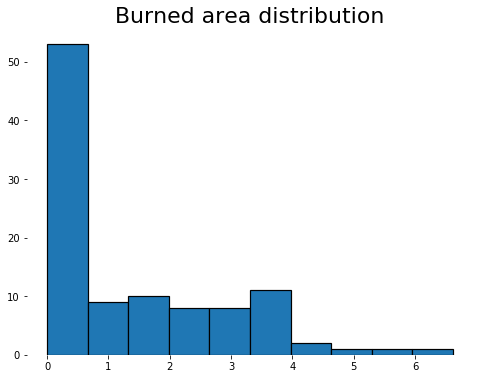

In [43]:
area_values = list(np.log(np.array(predicted_y) + 1))
histogram_plot(area_values, title = "Burned area distribution")